In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/uos/

/content/drive/MyDrive/uos


In [ ]:
#라이브러리 로드
import re
import json
import time
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!python3 -m pip install --upgrade pip
!python3 -m pip install konlpy       
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
import konlpy
import gensim 
import glob, os
import requests
!pip install fasttext
import fasttext
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import seaborn as sns
from glob import glob
import urllib.request
import matplotlib as mpl
from matplotlib import rc
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
from konlpy.tag import Mecab
mecab = Mecab()
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
from wordcloud import ImageColorGenerator
from IPython.display import Image, display
from sklearn.metrics import silhouette_score
!pip install selenium
from selenium.webdriver.common.keys import Keys
from gensim.models import Word2Vec, FastText, Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS as stopwords
from selenium.webdriver.common.action_chains import ActionChains
import warnings
warnings.filterwarnings(action='ignore')

### __Preprocessing__

In [ ]:
#데이터 로드
import pandas as pd
df = pd.read_csv("에브리타임_크롤링_최종.csv")

In [ ]:
#형태소 분석
def tokenized_mecab(data):
    #result = mecab.morphs(data)
    result = mecab.nouns(data)
    result = ' '.join(result)
    return result

df['tokenized'] = df['리뷰내용'].apply(tokenized_mecab)
df[['tokenized']].head(5)

,tokenized
0,영어 성적 수 토플 라이팅 점 기준
1,교수 강의 질문 문제 숙제 과제 때문 수 자신 영어 문장력 추천 학점 주심
2,교수 친절 최고
3,수업 시간 수업 자체 열정 시험 과제 에세이 피드백 학점
4,교수 수업 걸 수 생각 김선희 교수 수업 다음 학기


In [ ]:
#불용어 처리
def out_stopwords(data, list_stopwords):
    data = data.split(" ")
    list_stopwords = list_stopwords
    data = [token for token in data if token not in list_stopwords]
    return data

stopwords = list(open('stopwords.txt', 'r'))
list_stopwords = [] 
for stopword in stopwords:
  list_stopwords.append(stopword)

#list_stopwords.append('추가할불용어')

df['cleared'] = df['tokenized'].apply(lambda x: out_stopwords(x, list_stopwords = list_stopwords))
df[['cleared']].head(5)

,cleared
0,"[영어, 성적, 수, 토플, 라이팅, 점, 기준]"
1,"[교수, 강의, 질문, 문제, 숙제, 과제, 때문, 수, 자신, 영어, 문장력, 추..."
2,"[교수, 친절, 최고]"
3,"[수업, 시간, 수업, 자체, 열정, 시험, 과제, 에세이, 피드백, 학점]"
4,"[교수, 수업, 걸, 수, 생각, 김선희, 교수, 수업, 다음, 학기]"


In [ ]:
#단어 corpus 생성
word_list = []
for i in df['cleared']:
  #temp_list = [x for x in temp_list if pd.isnull(x)==False] # nan 제거 
  tmp = ' '.join(i)
  word_list.append(tmp)

review_df = df.copy()
print(len(word_list))
print(len(review_df))

7186
7186


In [ ]:
word_list

['영어 성적 수 토플 라이팅 점 기준',
 '교수 강의 질문 문제 숙제 과제 때문 수 자신 영어 문장력 추천 학점 주심',
 '교수 친절 최고',
 '수업 시간 수업 자체 열정 시험 과제 에세이 피드백 학점',
 '교수 수업 걸 수 생각 김선희 교수 수업 다음 학기',
 '학기 수업 기준 작성 수강 평 교수 저희 학교 교수 학생 열정 교수 개인 강의 시사 영어 수업 김선희 교수 수업 교양 영어 과목 중 최고 단언 수업 진행 출결 수업 시작 명 명 영문 분석 활용 취지 교수 교재 문법 영단 영어 에세이 작성 방법 설명 대학 영어 분 상승효과 것 시험 중간 기말 과제 대체 중간 에세이 작성 후 학우 분 후 피드백 바탕 에세이 제출 거 제 글 학우 분 수 것 제출 후 희망자 해 교수 피드백 도움 과제 작성 것 기말 내 주장 논리 설득 거 수준 것 교재 영어 글쓰기 분 팀 플 팀 플 분 추천 무엇 교수 열정 게 수업 강추',
 '교수 학점 주세요 발표 때 자신 가능',
 '학기 중 성적 개인 이번 학기 수업',
 '개인 강추 교수 친절 학생 발언 수 보장 편 일정 주기 과제 프레젠테이션 동영상 피드백 과정 추가 교수 피드백 개인',
 '수업 발표 자세 꺼 영어 분 동영상 이주 번 게 저 개인 대신 시험 인터뷰 공부 시간 때문 교양 투자 시간',
 '처음 온라인 강의 불편 점 출석 부분 감점 학생 것 성적 개인 수업',
 '이번 온라인 강의 동영상 영어 프레젠테이션 녹화 업로드 실시간 진행 진행 프레젠테이션 학점 수업 수강 건 비추 성적 외 생각 친구 인생 타인 관계 사회 문제 생각 의견 토론 시간 과제 수 영어 학우 대화 발표 기회 추천',
 '교수 배려 학생 마음 친구',
 '온라인 강의 녹화 것 교수 수업 내용 면강 때 거 추천',
 '온라인 동영상 촬영 것 수 게 것 이번 강의 교수 학점 절 평이 학점 거 학점 부담',
 '기본 회화 실력 영향 영어 실력 참여 적극',
 '중간 팀 플 팀 발표 토론 수업 꿀 과제 경우 매주 메일 과제 제출 기한 내 제출 게',

### __LDA__

In [ ]:
# 1. Vector화
#LDA 는 Count기반의 Vectorizer만 적용 
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect = count_vectorizer.fit_transform(word_list) # 오류 -> 해결(list->str)
print('CountVectorizer Shape:', feat_vect.shape)

# 2. 토픽모델링: LDA
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=8)  
lda.fit(feat_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=500, max_iter=10, mean_change_tol=0.001,
             n_components=8, n_jobs=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

# 3. 토픽별 연관어 출력
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index+1)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 10)

# 4. ⁣각 문서별로 가장 가까운 topic으로 할당

# 문서별로, 가장 확률이 높은 topic으로 할당해줌
doc_topic = lda.transform(feat_vect)
doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])
display(doc_topic_df.head())

# 실제 데이터와 조인 
doc_topic_df = doc_topic_df.join(df)
doc_topic_df.tail()

# 5. 토픽별 문서 수 계산
display(doc_topic_df.groupby('Topic')[['Doc_Num']].count())

# 6. 토픽별 가장 높은 확률로 할당된 문서 top3 확인
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['리뷰내용'].iloc[0])
    print(top_pr_topics['리뷰내용'].iloc[1])
    print(top_pr_topics['리뷰내용'].iloc[2], '\n')

# 7. LDA 시각화: pyLDAvis
!pip install pyLDAvis
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis) 

CountVectorizer Shape: (7186, 1000)
Topic # 1
친절 교수 친절 열정 자체 한자 자격증 과목 교수 열정 엑셀 성적
Topic # 2
부담 대체 오픈 봉사 대면 대체 과제 레포트 과제 부담 시험 과제 중간 기말
Topic # 3
점수 출석 연습 범위 학기 교재 때문 연습 문제 제출 이번
Topic # 4
설명 이해 학기 최고 질문 수강 수업 내용 부분 역사 수업 시간
Topic # 5
레포트 성적 실험 클래식 만큼 필기 점수 물리 에이 시험 문제
Topic # 6
진행 자료 피피티 영상 주제 영어 자기 대신 작성 방식
Topic # 7
발표 토론 점수 중간고사 기말고사 참여 질문 개인 조별 하나
Topic # 8
기준 퀴즈 관심 자체 배려 평가 만족 성적 개인 철학


,Doc_Num,Topic,Percentage
0,0,7,0.507233
1,1,4,0.507197
2,2,0,0.530092
3,3,0,0.732141
4,4,3,0.874935


,Doc_Num
Topic,
0,1053
1,874
2,836
3,1251
4,869
5,670
6,760
7,873


Topic # 0 -----------------------------
절대 꿀 강의라고는 못하겠다. 자격증을 딸 수 있어 꿀강이라곤 하는데 글쎄, 한국에선 모스자격증을 취급해주진 않으니까,,,.? 그리고 매주 과제가 나는 매우 스트레스였다. 알고 들은건데 생각외로 시간도 많이 잡아먹고 과제 양도 많음. 과제를 똑같이 할 필요는 없는 것 같다. 난 다 틀리게 했는데도 냈다는거에 의의를 두시는 듯. 일일히 다 확인도 할 수 없고.엑셀 파워포인트 할 줄 아는 상태로 시작해서 파워포인트는 쉽게 했고 엑셀도 동부 안하고 당일날 모의고사 1회 30분 풀어보고 합격함. 문제가 아주 그냥 똑같았음. 30분 일찍끝내주셔서 남은 30분간 과제를 해도 되고 집에 가도 된다고 하셨음. 엑셀시험 팁은 버릴건 버리고 쉬운것만 해서 합격만 하자. 자격증만 따도 B0임 자격증 있는데 재수강 못하도록.
이번에는 시험 볼 수도 있는데 저는 과제 3개에 대면시험 1번으로 평가 했어요 수업은 유튜브로 올려주셔서 부담 제로고 가끔 줌으로 공지하기도 하세요 은은한 개그가 웃겼고 학생들 귀찮아하는 포인트 알아주셔서 좋았음ㅎㅎ 한자는 전에 공부해본 사람이라면 이틀정도 밤새면 무난히 외울 수 있는 정도입니다 한번도 외워본 적 없는 사람이면 꾸준히 외워두셔야 편할듯 해요 과제는 그냥 글쓰기같은거랑 교과사에 한자 옮겨적기 이정도인데 난이도는 낮은데 부지런히 해둬야하는 느낌? 저는 에이쁠 받았어요 한자 공부해본적 있는 사람이면 진짜 개꿀강입니다 한자 급수를 따고 싶은 사람에겐 비추천해요 고민 한번 해보세요 한자의 어원을 알 수 있고, 한자어에 대한 유래?나 이게 한자어였어? 하는거 재미있어하시면 들어도 좋을 것 같아요
파워포인트랑 엑셀 자격증 따는 시험인데 아무라도 자격증을 따니까 실질적으로 제일 남는게 있는 교양이 아닌가싶음 ㅎㅎ 교수님 친절하시고 졸리지도 않음 다만 파워포인트는 엄청 쉬운데 엑셀이 기능이 이렇게 많은지 처음암 그래도 과제 잘 하고 시험전에 모의고사 두번씩만 풀어보면 그냥 패스하긴 할듯 


### __WordRank__

In [ ]:
#konlpy 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

#JAVA_HOME 환경변수 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Re

bash: line 7: fg: no job control


In [ ]:
#강의별 리뷰 생성
df['cleared2'] = word_list
name_list = df['교과번호'].unique().tolist()
for i, name in enumerate(name_list):
  globals()['df{}'.format(i+1)] = df[df['교과번호']==name].reset_index(drop=True)

In [ ]:
#강의별 리뷰리스트 생성
for i, name in enumerate(name_list):
  globals()['review_list{}'.format(i+1)] = locals()['df{}'.format(i+1)]['cleared2'].tolist()
review_list1[:5]

['영어 성적 수 토플 라이팅 점 기준',
 '교수 강의 질문 문제 숙제 과제 때문 수 자신 영어 문장력 추천 학점 주심',
 '교수 친절 최고',
 '수업 시간 수업 자체 열정 시험 과제 에세이 피드백 학점',
 '교수 수업 걸 수 생각 김선희 교수 수업 다음 학기']

In [ ]:
#키워드 추출 함수 정의
!pip install KRWordRank
def lecture_keyword(reviewlist, stopwords):
  from krwordrank.word import summarize_with_keywords
  #stopwords = {'그래도', '너무', '맘에', '리뷰', '들어'} 
  keywords = summarize_with_keywords(reviewlist, min_count=3, max_length=10,
             beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
  return keywords

In [ ]:
#키워드 칼럼 생성
name_list = df['교과번호'].unique().tolist()
key_list = []
for i, name in enumerate(name_list):
  try:
    keywords = lecture_keyword(locals()['review_list{}'.format(i+1)], stopwords)
    top5 = sorted(keywords)[:5]
  except:
    top5 = np.nan
  for j in range(len(df[df['교과번호']==name])):
    key_list.append(top5)
df['키워드'] = key_list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 43
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 60
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 44
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 92
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 11
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 50
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 24
done
Looking in indexes: https://pypi.org/simp

In [ ]:
#키워드 포함 전처리 파일 저장
df.to_csv('에브리타임_크롤링_키워드.csv', encoding='utf-8-sig', index=False)

### __WordCloud__

In [ ]:
#워드 클라우드 함수 정의
!pip install wordcloud
def lecture_wordcloud(stopwords, keywords):
  from wordcloud import WordCloud, ImageColorGenerator
  from PIL import Image
  font_path = '/content/drive/MyDrive/NanumSquareB.ttf'
  icon = Image.open('이루매_logo-removebg-preview.png')
  mask = Image.new("RGB", icon.size, (255,255,255))
  mask.paste(icon,icon)
  mask = np.array(mask)

  #stopwords = {'그래도', '너무', '맘에', '리뷰', '들어'}
  passwords = {word:score for word, score in sorted(
               keywords.items(), key=lambda x:-x[1]) if not (word in stopwords)}
  krwordrank_cloud = WordCloud(
                     font_path = font_path,
                     mask = mask,
                     width = 800,
                     height = 800,
                     background_color="white"
                     )
  krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)
  image_colors = ImageColorGenerator(mask)
  
  import matplotlib.pyplot as plt
  fig = plt.figure(figsize=(10, 10))
  plt.imshow(krwordrank_cloud.recolor(color_func=image_colors), interpolation="bilinear")
  plt.axis('off')
  plt.savefig('강의리뷰워드클라우드.png')
  return plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
scan vocabs ... 
num vocabs = 2744
done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


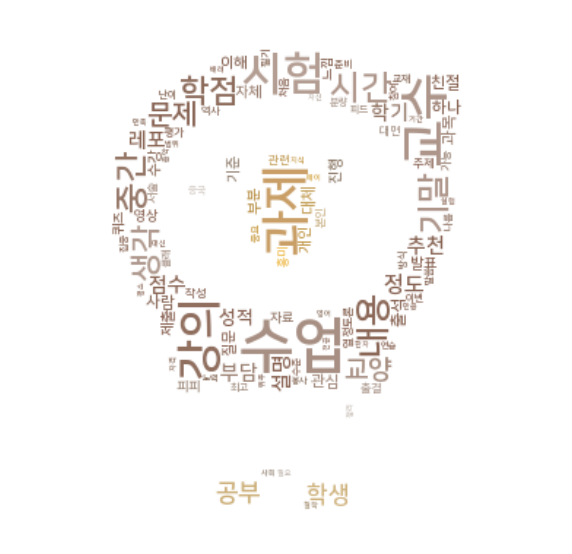

In [ ]:
#전체 리뷰에 대한 워드클라우드 생성
review_list = df['cleared2'].tolist()
keywords = lecture_keyword(review_list, stopwords)
lecture_wordcloud(stopwords, keywords)